# Assignment 4: Natural Language Processing
**Gillian McGovern, Dhanya Nair, Dirk Hartog**


Please answer the following questions in an IPython Notebook, posted to GitHub.

1. Choose a corpus of interest.
2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting,
defensible way).
3. Taking the most common words, how many unique words represent half of the total words in the corpus?
4. Identify the 200 highest frequency words in this corpus.
5. Create a graph that shows the relative frequency of these 200 words.
6. Does the observed relative frequency of these words follow Zipf’s law? Explain.
7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”# Assignment 4:


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
! pip install nltk
import nltk, re, pprint

## 1. Choose a corpus of interest

**"The Picture of Dorian Grey" by Oscar Wilde**

Source: https://www.gutenberg.org/cache/epub/174/pg174.txt

In [ ]:
import requests

url = "https://www.gutenberg.org/cache/epub/174/pg174.txt"

# Read in the text file
response = requests.get(url)
raw = response.text

### EDA

In [ ]:
# Get the length of the text file

print(len(raw))

# Find the beginning and of the text

print(re.search('The studio was filled with the rich odour of roses, and when the light', raw))
print(re.search('THE END', raw))

# Slice the raw text to extract only the story
raw_text = raw[3366:438667]

457528
<re.Match object; span=(3366, 3436), match='The studio was filled with the rich odour of rose>
<re.Match object; span=(438667, 438674), match='THE END'>


In [ ]:
# Tokenize the text
nltk.download('punkt_tab') # needed to use word_tokenize function

podg_tokens = nltk.word_tokenize(raw_text.lower())

# Create a nltk text object

podg_text = nltk.Text(podg_tokens)

type(podg_text)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


nltk.text.Text

In [ ]:
podg_tokens[0:25]

['the',
 'studio',
 'was',
 'filled',
 'with',
 'the',
 'rich',
 'odour',
 'of',
 'roses',
 ',',
 'and',
 'when',
 'the',
 'light',
 'summer',
 'wind',
 'stirred',
 'amidst',
 'the',
 'trees',
 'of',
 'the',
 'garden',
 ',']

There still appears to contain some **stop words** and **punctuation characters** that should be removed from the corpus

In [ ]:
nltk.download('stopwords')

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

len(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


198

In [ ]:
# Remove punctuation

podg_tokens_cleaned = [word for word in podg_tokens if re.findall(r'[^\W]', word)]

# Remove stop words

podg_tokens_cleaned = [word for word in podg_tokens_cleaned if word not in stop_words]

## 2. How many total unique words are in the corpus?
*(Please feel free to define unique words in any interesting,
defensible way).*

We will define unique words as those that are not stop words or any punctuation character and that shows up at least once in the text.

In [ ]:
# Find the final token size
total_tokens = len(podg_tokens_cleaned)
print(f'Final token size: {total_tokens}')

# Find number of unique tokens
total_unique_tokens = len(set(podg_tokens_cleaned))
print(f'Unique tokens: {total_unique_tokens}')

# Calculate lexicon diversity
print(f'Average number of times a unique token appears: {total_tokens / total_unique_tokens:.2f}')

Final token size: 36725
Unique tokens: 7504
Average number of times a unique token appears: 4.89


## 3. Taking the most common words, how many unique words represent half of the total words in the corpus?

In [ ]:
# Create a frequency distribution dictionary
from nltk.probability import FreqDist

freq_dict = dict(FreqDist(podg_tokens_cleaned))

# Create a sorted dictionary
freq_dict_sorted = dict(sorted(freq_dict.items(), key = lambda x: x[1], reverse = True))

In [ ]:
# capture the word contributing to the count of half the total corpus
words = []

# initate count at 0
i = 0
for key, value in freq_dict_sorted.items(): # loop through the sorted dictionay
    if i <= len(podg_tokens_cleaned)/2: # evaluate i is still less than half of the total corpus
        words.append(key) # add the word to the list
        i = i + value # update the value of i

In [ ]:
print(f'The number of unique words that represent half of the total words in the corpus is {len(words)}')

The number of unique words that represent half of the total words in the corpus is 363


##  4. Identify the 200 highest frequency words in this corpus.

In [ ]:
print(list(freq_dict_sorted.keys())[0:199])

['one', 'dorian', 'would', 'said', 'lord', 'henry', 'life', 'like', 'gray', 'man', 'never', 'know', 'harry', 'basil', 'must', 'could', 'think', 'come', 'see', 'things', 'seemed', 'something', 'us', 'thing', 'go', 'made', 'always', 'love', 'eyes', 'quite', 'time', 'want', 'good', 'face', 'really', 'back', 'away', 'people', 'came', 'cried', 'looked', 'say', 'tell', 'hallward', 'world', 'look', 'nothing', 'room', 'little', 'answered', 'much', 'going', 'upon', 'thought', 'sibyl', 'round', 'shall', 'yes', 'mr.', 'told', 'ever', 'felt', 'great', 'dear', 'men', 'yet', 'young', 'lady', 'long', 'moment', 'let', 'picture', 'everything', 'women', 'door', 'anything', 'went', 'hand', 'art', 'two', 'across', 'might', 'asked', 'soul', 'make', 'passed', 'afraid', 'night', 'old', 'every', 'day', 'well', 'looking', 'wonderful', 'table', 'vane', 'turned', 'got', 'lips', 'beauty', 'left', 'portrait', 'head', 'course', 'white', 'lad', 'hands', 'sir', 'done', 'better', 'believe', 'right', 'house', 'still', 

## 5. Create a graph that shows the relative frequency of these 200 words.

In [ ]:
# Create a data frame for easier reference in plotting
freq_df = pd.DataFrame({"word" : freq_dict_sorted.keys(), "frequency" : freq_dict_sorted.values()})

freq_200 = freq_df.copy() # Create a copy filtering the top 200 most frequent words
freq_200 = freq_200.iloc[0:200,:]


freq_200["rel_freq"] = freq_200["frequency"] / i # is the length of the total tokens in half the corpus

freq_200["percent"] = round(freq_200["rel_freq"] * 100, 2)

In [ ]:
freq_200.head()

,word,frequency,rel_freq,percent
0,one,427,0.023239,2.32
1,dorian,405,0.022042,2.20
2,would,305,0.016600,1.66
3,said,261,0.014205,1.42
4,lord,248,0.013497,1.35


In [ ]:
freq_200.tail()

,word,frequency,rel_freq,percent
195,find,31,0.001687,0.17
196,almost,31,0.001687,0.17
197,sat,31,0.001687,0.17
198,feet,31,0.001687,0.17
199,to-night,31,0.001687,0.17


Creating a bar chart would be too cumbersome with 200 categories so a histogram was created to visualize the distribution of the relative frequencies in the top 200 words

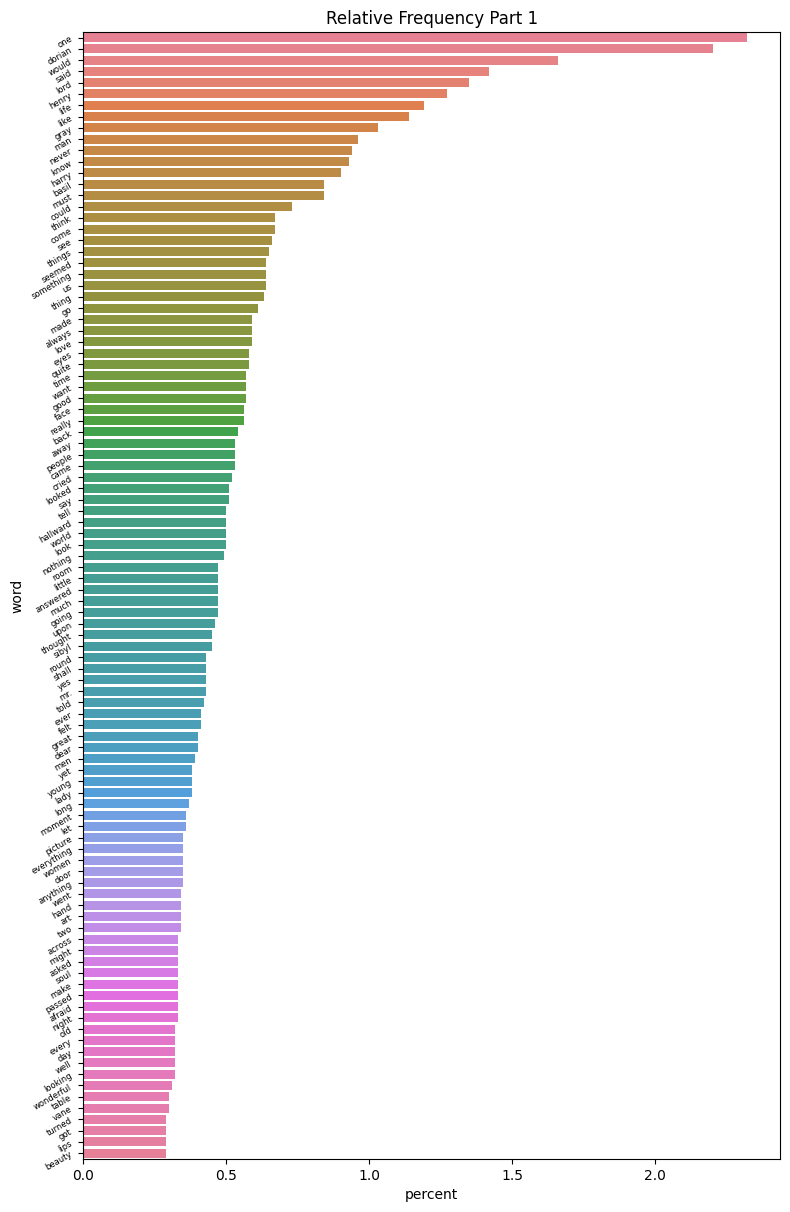

In [ ]:
# Create a graph

# Split df into 2
freq_200_1 = freq_200.head(100)
freq_200_2 = freq_200.tail(100)

# First 100
plt.figure(figsize = (8, 12))
sns.barplot(data = freq_200_1, y = "word", x =  "percent", hue='word', dodge=False)
plt.yticks(size = 6, rotation=30)
plt.tight_layout()
plt.title("Relative Frequency Part 1")
plt.show()

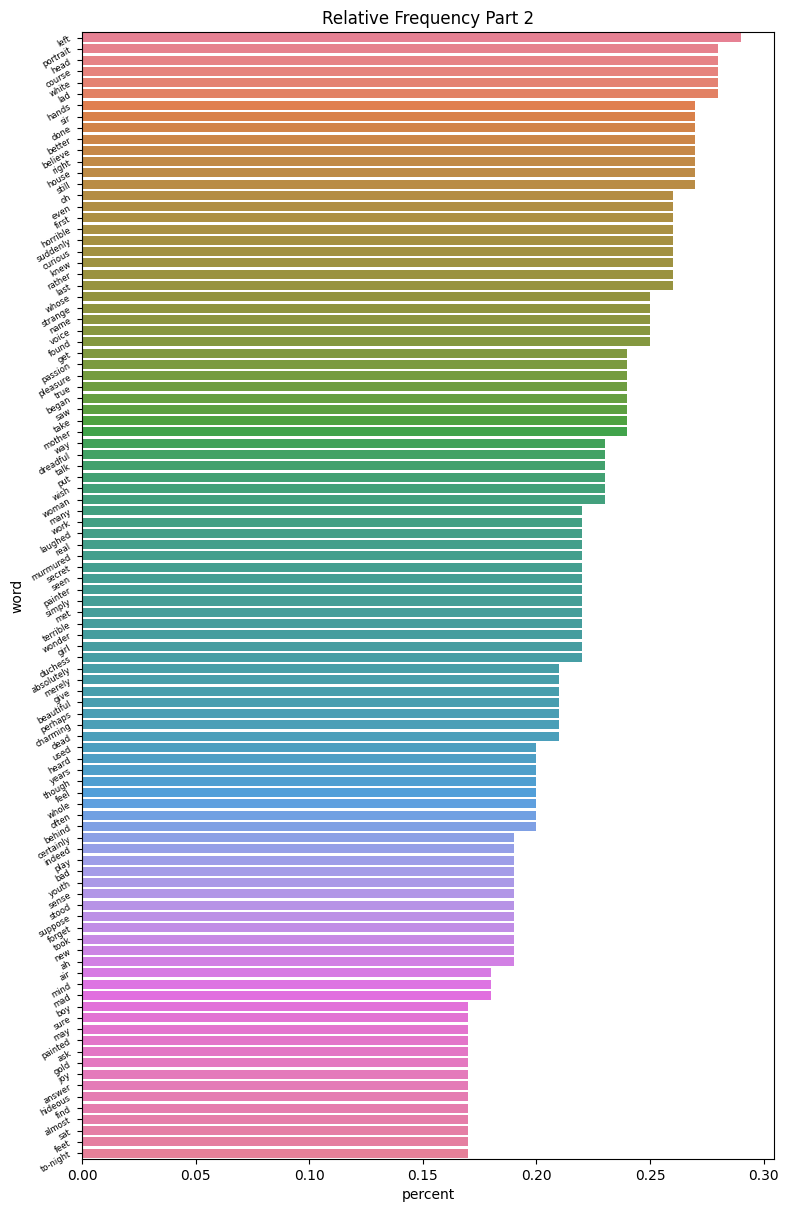

In [ ]:
# Graph last 100
plt.figure(figsize = (8, 12))
sns.barplot(data = freq_200_2, y = "word", x =  "percent", hue='word', dodge=False)
plt.yticks(size = 6, rotation=30)
plt.tight_layout()
plt.title("Relative Frequency Part 2")
plt.show()

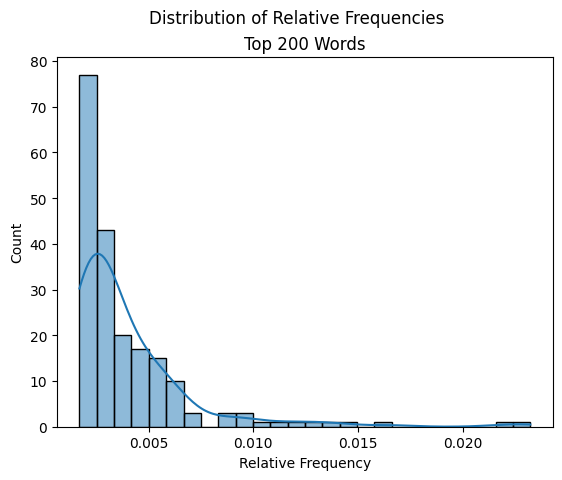

In [ ]:
# Create a histogram to visualize the distribution of the releative frequency

sns.histplot(data = freq_200, x = "rel_freq", kde=True)
plt.suptitle("Distribution of Relative Frequencies")
plt.xlabel("Relative Frequency")
plt.ylabel("Count")
plt.title("Top 200 Words")
plt.show()

## 6. Does the observed relative frequency of these words follow Zipf’s law? Explain.

According to the definition on page 76 in "Natural Language Processing with Python" **Zipf’s Law:** Let f(w) be the frequency of a word w in free text. Suppose that all the words of a text are ranked according to their frequency, with the most frequent word first.

**Zipf’s Law** states that the frequency of a word type is inversely proportional to its rank (i.e., f × r = k, for some constant k). For example, the 50th most common word type should occur three times as frequently as the 150th most common word type.

In [ ]:
# add a rankings column
rankings = [*range(1, freq_df.shape[0] + 1)]

freq_df["rank"] = rankings

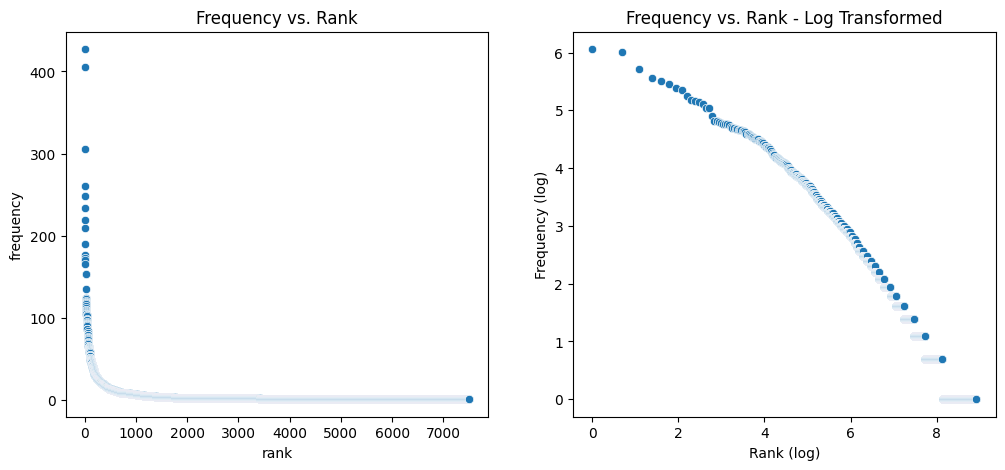

In [ ]:
# Plot two graphs side by side frequency x rank
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5))
# frequency by rank
sns.scatterplot(freq_df, x = "rank", y = "frequency", ax = ax[0])
ax[0].set_title("Frequency vs. Rank")
plt.xlabel("Rank")
plt.ylabel("Frequency")

# Convert frequency and rank to logrithmic values and replot
freq_df["rank_log"] = np.log(freq_df["rank"])
freq_df["frequency_log"] = np.log(freq_df["frequency"])

sns.scatterplot(freq_df, x = "rank_log", y = "frequency_log", ax = ax[1])
ax[1].set_title("Frequency vs. Rank - Log Transformed")
plt.xlabel("Rank (log)")
plt.ylabel("Frequency (log)")

plt.show()

In [ ]:
# Get the frequcy of the 50th most common word type
print(freq_df.loc[freq_df["rank"] == 50, "frequency"])

# Get the frequcy of the 150th most common word type
print(freq_df.loc[freq_df["rank"] == 150, "frequency"])

49    87
Name: frequency, dtype: int64
149    40
Name: frequency, dtype: int64


The observed frequency in The Picture of Dorian Gray does follow Zipf's Law that states rank and refequency are inversely proportional. The log transformed values demonstrate this inverse relationship more clearly. The deviations in the tail (longer ranks, lower frequency) are expected due to finite corpus size and rare vocabulary usage.



## 7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

The frequency of words in The Picture of Dorian Gray differs in several important ways from what we would observe in a general, all words in all corpora:
1. Genre and Style
The book written by a specific author usually have thier own styles of writing, character development and themes based on the story they are trying to tell.

2. Character-Driven Vocabulary
A general corpus captures evolving usage over time, including slang and internet-era expressions that are completely absent from the novel which is  reflecting 19th-century English.

3. Subjective
As we saw in this corpus three male names were in top 20 most frequent words (Dorian, Harry, Henry). Perhaps these names may have been popular in the 19th centry when the book was written and might have shown up more frequenty in other corpus. To generalize this onto all corpora would not be accurate.   

Overall, the word frequencies in this novel reflect the constraints of its author, era, genre, and subject, whereas "all words in all corpora" would reflect a much broader and more balanced distribution of language use across contexts.